In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris()

In [4]:
X = iris.data

In [5]:
y = iris.target

In [6]:
print(f"shape: {X.shape}")

shape: (150, 4)


In [8]:
# shape 150 flowers, 4 measurements
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
dbscan = DBSCAN(eps=1.0, min_samples= 3)
dbscan_labels = dbscan.fit_predict(X)

In [10]:
n_clusters = len(set(dbscan_labels)) - ( 1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

In [11]:
n_clusters

2

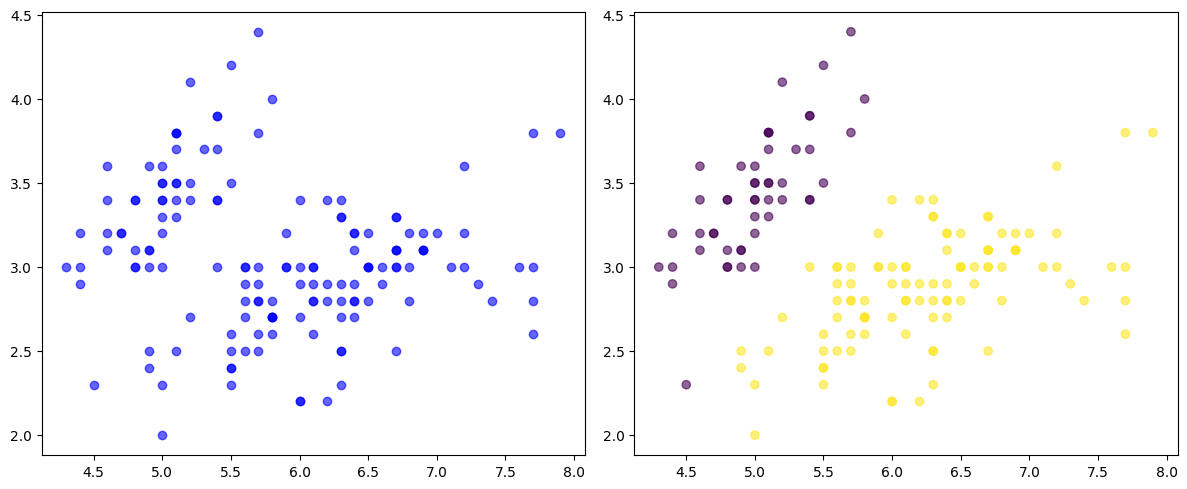

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = 'blue', alpha = 0.6)
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c = dbscan_labels, cmap = 'viridis', alpha = 0.6)
plt.tight_layout()
plt.show()

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_probs = gmm.predict_proba(X_scaled)

In [16]:
print("Example - First 5 flowers and their cluster probabilities")
print("flower , cluster 0, cluster 1, cluster 2")

Example - First 5 flowers and their cluster probabilities
flower , cluster 0, cluster 1, cluster 2


In [19]:
for i in range(10):
    probs = gmm_probs[i]
    assigned = gmm_labels[i]
    print(f" {i+1} | {probs[0]:.3f} |  {probs[1]:.3f} |  {probs[2]:.3f} ")
print()

 1 | 0.000 |  1.000 |  0.000 
 2 | 0.000 |  1.000 |  0.000 
 3 | 0.000 |  1.000 |  0.000 
 4 | 0.000 |  1.000 |  0.000 
 5 | 0.000 |  1.000 |  0.000 
 6 | 0.000 |  1.000 |  0.000 
 7 | 0.000 |  1.000 |  0.000 
 8 | 0.000 |  1.000 |  0.000 
 9 | 0.000 |  0.120 |  0.880 
 10 | 0.000 |  1.000 |  0.000 



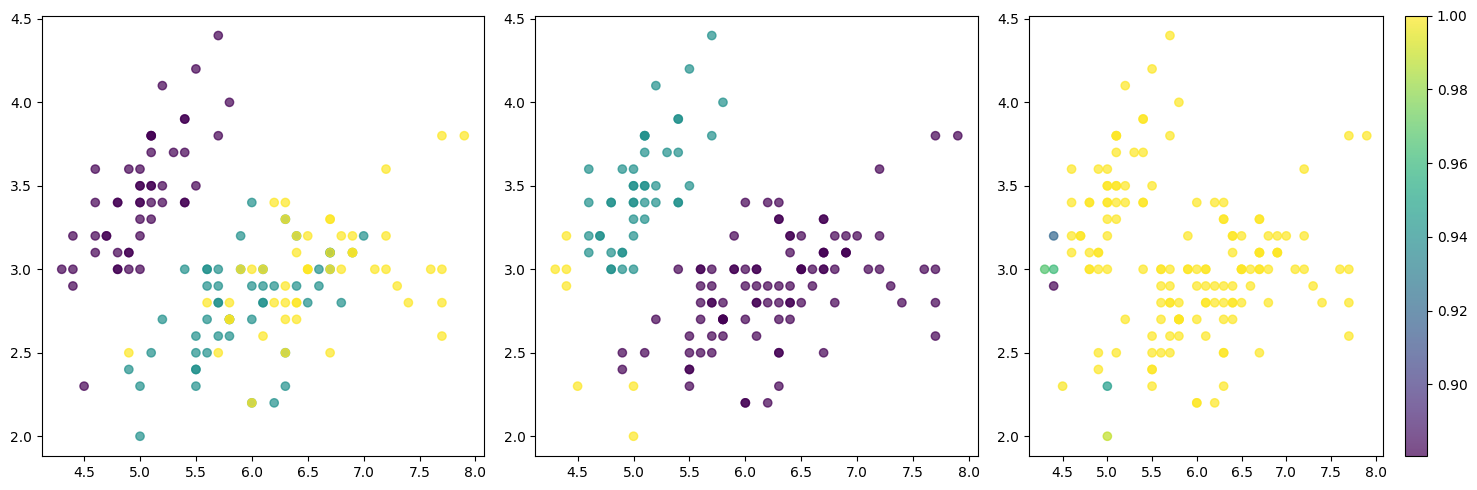

In [21]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.subplot(1,3,3)

max_probs = np.max(gmm_probs, axis = 1)

plt.scatter(X[:, 0], X[:, 1], c=max_probs, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.tight_layout()
plt.show()





In [22]:
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score

 
ari = adjusted_rand_score(y, gmm_labels)  
nmi = normalized_mutual_info_score(y, gmm_labels) 

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Info: {nmi:.4f}")


Adjusted Rand Index: 0.5165
Normalized Mutual Info: 0.6571
